# Decision Trees

## Objectives

After completing this lab you will be able to:

-   Develop a classification model using Decision Tree Algorithm


In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">About the dataset</a></li>
        <li><a href="#downloading_data">Loading the Data</a></li>
        <li><a href="#pre-processing">Pre-processing</a></li>
        <li><a href="#setting_up_tree">Setting up the Decision Tree</a></li>
        <li><a href="#modeling">Modeling</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Evaluation</a></li>
        <li><a href="#visualization">Visualization</a></li>
    </ol>
</div>
<br>
<hr>


Import the Following Libraries:

<ul>
    <li> <b>numpy (as np)</b> </li>
    <li> <b>pandas</b> </li>
    <li> <b>DecisionTreeClassifier</b> from <b>sklearn.tree</b> </li>
</ul>


In [46]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the Dataset</h2>
    <p>Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.</p> 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of multiclass classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>


<div id="downloading_data"> 
    <h2>Loading the Data</h2>
    To load the data, we will use the drug200.csv
</div>


Now, read data using pandas dataframe:


In [47]:
df=pd.read_csv('drug200.csv')
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC


<div id="practice"> 
    <h3>Practice</h3> 
    What is the size of data? 
</div>


In [48]:
df.shape

(200, 6)

<div href="pre-processing">
    <h2>Pre-processing</h2>
</div>


Using <b>my_data</b> as the Drug.csv data read by pandas, declare the following variables: <br>

<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of my_data) </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>


Remove the column containing the target name since it doesn't contain numeric values.


As you may figure out, some features in this dataset are categorical such as **Sex** or **BP**. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. **pandas.get_dummies()**
Convert categorical variable into dummy/indicator variables.


In [50]:
from sklearn.preprocessing import LabelEncoder
def my_label_encoder(y):
    """
    Funktion zum Kodieren einer kategorischen Spalte in einem DataFrame.

    """
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])
    
    return df

df.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


In [51]:
my_label_encoder('Sex')
my_label_encoder('BP')
my_label_encoder('Cholesterol')
df.head(3)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC


Now we can fill the target variable.


In [52]:
from sklearn.model_selection import train_test_split
X = df.drop('Drug', axis='columns')
y = df['Drug']

<hr>

<div id="setting_up_tree">
    <h2>Setting up the Decision Tree</h2>
    We will be using <b>train/test split</b> on our <b>decision tree</b>. 
</div>


In [53]:
from sklearn.model_selection import train_test_split


Now <b> train_test_split </b> will return 4 different parameters. We will name them:<br>
X_trainset, X_testset, y_trainset, y_testset <br> <br>
The <b> train_test_split </b> will need the parameters: <br>
X, y, test_size=0.3, and random_state=3. <br> <br>
The <b>X</b> and <b>y</b> are the arrays required before the split, the <b>test_size</b> represents the ratio of the testing dataset, and the <b>random_state</b> ensures that we obtain the same splits.


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

<h3>Practice</h3>
Print the shape of X_trainset and y_trainset. Ensure that the dimensions match


In [55]:
X_train.shape

(140, 5)

In [56]:
y_train.shape

(140,)

Print the shape of X_testset and y_testset. Ensure that the dimensions match


In [57]:
X_test.shape

(60, 5)

In [58]:
y_test.shape

(60,)

<hr>

<div id="modeling">
    <h2>Modeling</h2>
    We will first create an instance of the <b>DecisionTreeClassifier</b> called <b>drugTree</b>.<br>
    Inside of the classifier, specify <i> criterion="entropy" </i> so we can see the information gain of each node.
</div>


In [59]:
from sklearn.tree import DecisionTreeClassifier

drugTree = DecisionTreeClassifier(criterion='entropy') 


Next, we will fit the data with the training feature matrix <b> X_trainset </b> and training  response vector <b> y_trainset </b>


In [60]:
drugTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

<hr>

<div id="prediction">
    <h2>Prediction</h2>
    Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <b>predTree</b>.
</div>


In [61]:
predTree=drugTree.predict(X_test)

You can print out <b>predTree</b> and <b>y_testset</b> if you want to visually compare the prediction to the actual values.


In [62]:
print(predTree)
print(y_test.head(5))

['drugY' 'drugX' 'drugX' 'drugX' 'drugX' 'drugC' 'drugY' 'drugA' 'drugB'
 'drugA' 'drugY' 'drugA' 'drugY' 'drugY' 'drugX' 'drugY' 'drugX' 'drugX'
 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugB' 'drugY'
 'drugY' 'drugA' 'drugX' 'drugB' 'drugC' 'drugC' 'drugX' 'drugX' 'drugC'
 'drugY' 'drugX' 'drugX' 'drugX' 'drugA' 'drugY' 'drugC' 'drugY' 'drugA'
 'drugY' 'drugY' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX' 'drugY' 'drugX'
 'drugY' 'drugY' 'drugA' 'drugX' 'drugY' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


<hr>

<div id="evaluation">
    <h2>Evaluation</h2>
    Next, let's import <b>metrics</b> from sklearn and check the accuracy of our model.
</div>


In [63]:
from sklearn import metrics
accuracy = drugTree.score(X_test, y_test)
accuracy2 = drugTree.score(X_train, y_train)
print(accuracy, accuracy2)

0.9833333333333333 1.0


In [64]:
print(metrics.classification_report(y_test, predTree))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         5
       drugC       1.00      1.00      1.00         5
       drugX       1.00      0.95      0.98        21
       drugY       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



**Accuracy classification score** computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.  

In multilabel classification, the function returns the subset accuracy. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


<hr>

<div id="visualization">
    <h2>Visualization</h2>
    
    
Lets visualize the tree
</div>


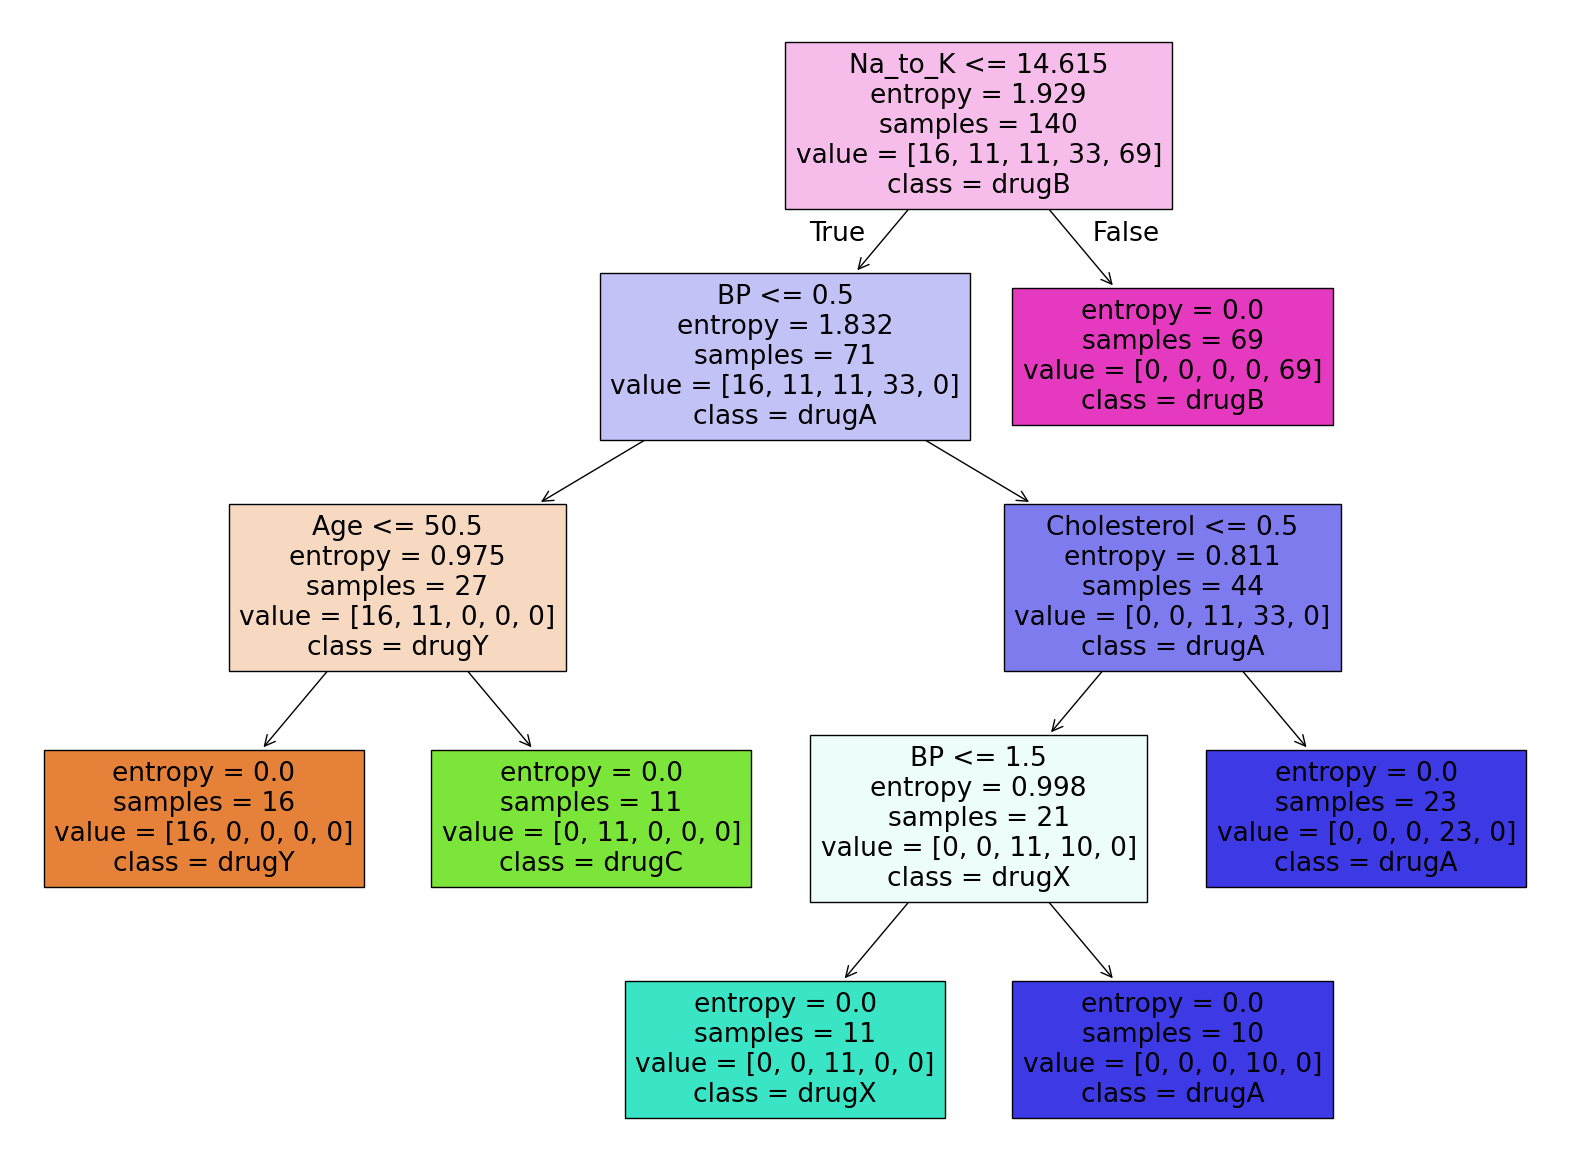

In [65]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Feature-Namen aus X extrahieren
feature_names = X.columns.tolist()

# Klassen-Namen aus y extrahieren (einzigartige Werte der Zielvariable)
class_names = y.unique().tolist()

# Angenommen, 'drugTree' ist Ihr trainiertes DecisionTreeClassifier-Modell
plt.figure(figsize=(20,15))  # Größe der Abbildung anpassen
plot_tree(drugTree, filled=True, feature_names=feature_names, class_names=class_names)
plt.show()